# Import data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Read in the csv file
df = pd.read_csv('../../../data/chocolate.csv')
df

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
3,797,A. Morin,France,2012,Peru,Peru,63%,"4- B,S,C,L","fruity, melon, roasty",3.75
4,797,A. Morin,France,2012,Bolivia,Bolivia,70%,"4- B,S,C,L","vegetal, nutty",3.50
...,...,...,...,...,...,...,...,...,...,...
2357,1205,Zotter,Austria,2014,Blend,Raw,80%,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75
2358,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75%,"3- B,S,C","strong nutty, marshmallow",3.75
2359,2170,Zotter,Austria,2018,Belize,Maya Mtn,72%,"3- B,S,C","muted, roasty, accessible",3.50
2360,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70%,"3- B,S,C","fatty, mild nuts, mild fruit",3.25


#### Look at our target variable

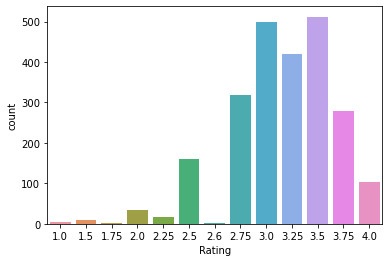

In [3]:
ax = sns.countplot(x="Rating", data=df)

In [4]:
# Change the column names
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')

In [5]:
# Check the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2362 entries, 0 to 2361
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ref                               2362 non-null   int64  
 1   company_(manufacturer)            2362 non-null   object 
 2   company_location                  2362 non-null   object 
 3   review_date                       2362 non-null   int64  
 4   country_of_bean_origin            2362 non-null   object 
 5   specific_bean_origin_or_bar_name  2362 non-null   object 
 6   cocoa_percent                     2362 non-null   object 
 7   ingredients                       2274 non-null   object 
 8   most_memorable_characteristics    2362 non-null   object 
 9   rating                            2362 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 184.7+ KB


Drop columns that don't relate to rating

In [6]:
# Change the Rating column to a string
df['rating'] = df['rating'].astype(str)

# Use 1's and 0's to find out what is a good rating of chocolate
df['rating'] = [1 if r >= '3.00' else 0 for r in df['rating']]

#  Drop columns to help our model preform
df = df.drop(['ref', 'specific_bean_origin_or_bar_name', 'most_memorable_characteristics'], axis=1)
df

,company_(manufacturer),company_location,review_date,country_of_bean_origin,cocoa_percent,ingredients,rating
0,5150,U.S.A.,2019,Madagascar,76%,"3- B,S,C",1
1,5150,U.S.A.,2019,Dominican Republic,76%,"3- B,S,C",1
2,5150,U.S.A.,2019,Tanzania,76%,"3- B,S,C",1
3,A. Morin,France,2012,Peru,63%,"4- B,S,C,L",1
4,A. Morin,France,2012,Bolivia,70%,"4- B,S,C,L",1
...,...,...,...,...,...,...,...
2357,Zotter,Austria,2014,Blend,80%,"4- B,S*,C,Sa",0
2358,Zotter,Austria,2017,Colombia,75%,"3- B,S,C",1
2359,Zotter,Austria,2018,Belize,72%,"3- B,S,C",1
2360,Zotter,Austria,2018,Congo,70%,"3- B,S,C",1


In [7]:
# Check the value counts for the 1's and 0's in the rating column
df['rating'].value_counts()

1    1317
0    1045
Name: rating, dtype: int64

In [8]:
# Change the Cocoa Percent to a float
df = df.replace('%', '', regex=True)
df['cocoa_percent'] = df['cocoa_percent'].astype(float)

In [9]:
# Check the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2362 entries, 0 to 2361
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   company_(manufacturer)  2362 non-null   object 
 1   company_location        2362 non-null   object 
 2   review_date             2362 non-null   int64  
 3   country_of_bean_origin  2362 non-null   object 
 4   cocoa_percent           2362 non-null   float64
 5   ingredients             2274 non-null   object 
 6   rating                  2362 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 129.3+ KB


In [10]:
# Check the new dataframe
df.isna().sum()

company_(manufacturer)     0
company_location           0
review_date                0
country_of_bean_origin     0
cocoa_percent              0
ingredients               88
rating                     0
dtype: int64

In [11]:
df = df.dropna()
df

,company_(manufacturer),company_location,review_date,country_of_bean_origin,cocoa_percent,ingredients,rating
0,5150,U.S.A.,2019,Madagascar,76.0,"3- B,S,C",1
1,5150,U.S.A.,2019,Dominican Republic,76.0,"3- B,S,C",1
2,5150,U.S.A.,2019,Tanzania,76.0,"3- B,S,C",1
3,A. Morin,France,2012,Peru,63.0,"4- B,S,C,L",1
4,A. Morin,France,2012,Bolivia,70.0,"4- B,S,C,L",1
...,...,...,...,...,...,...,...
2357,Zotter,Austria,2014,Blend,80.0,"4- B,S*,C,Sa",0
2358,Zotter,Austria,2017,Colombia,75.0,"3- B,S,C",1
2359,Zotter,Austria,2018,Belize,72.0,"3- B,S,C",1
2360,Zotter,Austria,2018,Congo,70.0,"3- B,S,C",1


# Modeling

In [12]:
# Import packages
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE

In [13]:
# Target
y = df['rating']
# Features
X = df.drop('rating', axis=1)

#### Train-test split

In [14]:
# Initial Train-Test Split
X_tr, X_test, y_tr, y_test = train_test_split(X, y, random_state=2021)

In [15]:
# Validation Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, random_state=2021)

#### Scale the data

In [16]:
num_cols = list(X.select_dtypes('number').columns)
num_cols

['review_date', 'cocoa_percent']

In [17]:
cat_cols = list(X.select_dtypes('object').columns)
cat_cols

['company_(manufacturer)',
 'company_location',
 'country_of_bean_origin',
 'ingredients']

In [18]:
# Instantiate StandardScaler
scaler = StandardScaler()

In [19]:
# fit on Imputed training data
scaler.fit(X_train[num_cols])

StandardScaler()

In [20]:
# transform training and validation data
X_train_scaled = pd.DataFrame(scaler.transform(X_train[num_cols]), columns=num_cols)
X_val_scaled = pd.DataFrame(scaler.transform(X_val[num_cols]), columns=num_cols)

In [21]:
X_train_scaled

,review_date,cocoa_percent
0,-1.077920,-0.121524
1,0.275570,1.421907
2,-1.619316,0.457263
3,-0.807222,0.071405
4,0.004872,0.650192
...,...,...
1273,-0.265826,-0.893240
1274,0.004872,1.614836
1275,0.004872,0.264334
1276,1.358361,0.071405


#### Encode the categorical data

In [22]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [23]:
# fit on categorical data
ohe.fit(X_train[cat_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [24]:
# transform training and validation data
X_train_encoded = ohe.transform(X_train[cat_cols])
X_val_encoded = ohe.transform(X_val[cat_cols])

In [25]:
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=ohe.get_feature_names())
X_val_encoded_df = pd.DataFrame(X_val_encoded, columns=ohe.get_feature_names())

In [26]:
X_train_encoded_df

,x0_5150,x0_A. Morin,x0_AMMA,x0_Acalli,x0_Adi aka Fijiana (Easy In Ltd),x0_Aelan,x0_Aequare (Gianduja),x0_Ah Cacao,x0_Akesson's (Pralus),x0_Alain Ducasse,...,"x3_4- B,S*,C,Sa","x3_4- B,S*,C,V","x3_4- B,S*,V,L","x3_4- B,S,C,L","x3_4- B,S,C,Sa","x3_4- B,S,C,V","x3_4- B,S,V,L","x3_5- B,S,C,V,L","x3_5-B,S,C,V,Sa","x3_6-B,S,C,V,L,Sa"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
X_train_df = pd.concat([X_train_scaled, X_train_encoded_df], axis=1)
X_val_df = pd.concat([X_val_scaled, X_val_encoded_df], axis=1)

In [28]:
X_train_df.shape

(1278, 559)

In [29]:
X_val_df.shape

(427, 559)

#### First Logistic Regression Model

In [30]:
# Instantiate LogisticRegression
logreg = LogisticRegression(solver='liblinear')

I created a function to 

In [31]:
def modeling_function(model, X_train, y_train, X_val, y_val):

    # fit model on training data
    model.fit(X_train, y_train)

    # make predictions on training and validation data
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    # Print accuracy score
    print('Training accuracy: ', accuracy_score(y_train, train_preds))
    print('Validation accuracy: ', accuracy_score(y_val, val_preds))

    # return fitted model
    return model

In [32]:
# call modeling function
logreg = modeling_function(logreg, X_train_df, y_train, X_val_df, y_val)

Training accuracy:  0.7879499217527387
Validation accuracy:  0.6018735362997658


The accuracy score looks like there is a lot of varriance.

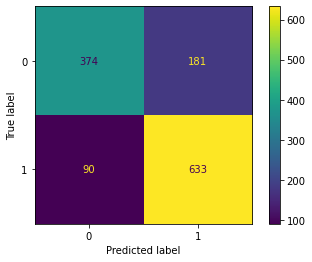

In [33]:
plot_confusion_matrix(logreg, X_train_df, y_train);

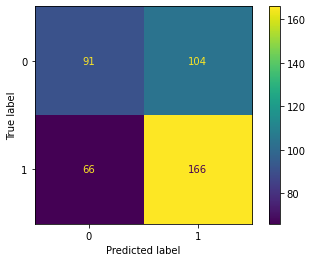

In [34]:
plot_confusion_matrix(logreg, X_val_df, y_val);

#### Use SMOTE to help fix this class imbalance and hopefully improve the model.

In [35]:
y.value_counts()

1    1286
0     988
Name: rating, dtype: int64

In [36]:
sm = SMOTE(random_state=2021)

In [37]:
X_train_res, y_train_res = sm.fit_resample(X_train_df, y_train)

In [38]:
y_train_res.value_counts()

1    723
0    723
Name: rating, dtype: int64

Check the different regularization perameters to test

In [39]:
C = [100, 10, 1, .1, .001]
for c in C:
    lg3 = LogisticRegression(penalty='l2', C=c, solver='liblinear')
    lg3.fit(X_train_df, y_train)
    print('C:', c)
    print('Training accuracy:', lg3.score(X_train_df, y_train))
    print('Test accuracy:', lg3.score(X_val_df, y_val))
    print('')

C: 100
Training accuracy: 0.8474178403755869
Test accuracy: 0.6088992974238876

C: 10
Training accuracy: 0.8411580594679187
Test accuracy: 0.594847775175644

C: 1
Training accuracy: 0.7879499217527387
Test accuracy: 0.6018735362997658

C: 0.1
Training accuracy: 0.6776212832550861
Test accuracy: 0.594847775175644

C: 0.001
Training accuracy: 0.5970266040688575
Test accuracy: 0.5644028103044496



# Observation

After looking at the first Logistic Regression some things need to be changed to help raise the validation accuracy score. Looking at the features more in depth can help the score. 

#### Second Logistic Regression Model

In [40]:
# Instantiate second LogisticRegression
logreg2 = LogisticRegression()

In [41]:
logreg2.fit(X_train_res, y_train_res)

LogisticRegression()

In [42]:
logreg2 = modeling_function(logreg2, X_train_res, y_train_res, X_val_df, y_val)

Training accuracy:  0.8049792531120332
Validation accuracy:  0.5901639344262295


Using SMOTE didn't change the accuracy score

#### Third Logistic Regression Model
I will be changing the regularization perameters 

In [43]:
logreg3 = LogisticRegression(solver='liblinear', penalty='l1', C=0.1) #

In [44]:
#logreg2.fit(X_train_res, y_train_res)

In [45]:
# Call modeling function
logreg3 = modeling_function(logreg3, X_train_res, y_train_res, X_val_df, y_val)

Training accuracy:  0.578838174273859
Validation accuracy:  0.5714285714285714


#### Desicion Tree Classifier

In [46]:
dt = DecisionTreeClassifier(random_state=2021)

In [47]:
dt = modeling_function(dt, X_train_res, y_train_res, X_val_df, y_val)

Training accuracy:  0.9861687413554634
Validation accuracy:  0.5761124121779859


#### Second Desicion Tree Classifier 

In [48]:
dt2 = DecisionTreeClassifier(random_state=2021, max_depth=10)

In [49]:
dt2 = modeling_function(dt2, X_train_res, y_train_res, X_val_df, y_val)

Training accuracy:  0.7593360995850622
Validation accuracy:  0.5807962529274004


#### Random Forest Classifier

In [50]:
rf = RandomForestClassifier(random_state=2021)

In [51]:
rf = modeling_function(rf, X_train_res, y_train_res, X_val_df, y_val)

Training accuracy:  0.9861687413554634
Validation accuracy:  0.6042154566744731


In [52]:
# Create Param Grid 
#param_grid = {'n_estimators': [50, 75, 100],
                #'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10],
                #'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [53]:
# Create GridSearchCV
#rf_gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy')

In [54]:
#rf_gs.fit(X_train_res, y_train_res)

In [55]:
#best_model = rf_gs.best_estimator_

In [56]:
#rf_gs.best_params_

In [57]:
#modeling_function(best_model, X_train_res, y_train_res, X_val_df, y_val)

### I am going to visit the dataframe and try to change somethings around to try and help our model

In [58]:
df2 = pd.read_csv('../../../data/chocolate.csv')
df2

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
3,797,A. Morin,France,2012,Peru,Peru,63%,"4- B,S,C,L","fruity, melon, roasty",3.75
4,797,A. Morin,France,2012,Bolivia,Bolivia,70%,"4- B,S,C,L","vegetal, nutty",3.50
...,...,...,...,...,...,...,...,...,...,...
2357,1205,Zotter,Austria,2014,Blend,Raw,80%,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75
2358,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75%,"3- B,S,C","strong nutty, marshmallow",3.75
2359,2170,Zotter,Austria,2018,Belize,Maya Mtn,72%,"3- B,S,C","muted, roasty, accessible",3.50
2360,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70%,"3- B,S,C","fatty, mild nuts, mild fruit",3.25


In [59]:
df2.columns = df2.columns.str.lower()
df2.columns = df2.columns.str.replace(' ','_')

In [60]:
df2 = df2.dropna()
df2 = df2.drop(columns=['specific_bean_origin_or_bar_name', 'most_memorable_characteristics'], axis = 1)
df2 = df2.replace('%', ' ', regex=True)
df2['cocoa_percent'] = df['cocoa_percent'].astype(float)

In [61]:
location_to_keep = list(df2['company_location'].value_counts()[:29].index)
filtered_df2 = df2[df2['company_location'].isin(location_to_keep)]
filtered_df2

,ref,company_(manufacturer),company_location,review_date,country_of_bean_origin,cocoa_percent,ingredients,rating
0,2454,5150,U.S.A.,2019,Madagascar,76.0,"3- B,S,C",3.75
1,2458,5150,U.S.A.,2019,Dominican Republic,76.0,"3- B,S,C",3.50
2,2454,5150,U.S.A.,2019,Tanzania,76.0,"3- B,S,C",3.25
3,797,A. Morin,France,2012,Peru,63.0,"4- B,S,C,L",3.75
4,797,A. Morin,France,2012,Bolivia,70.0,"4- B,S,C,L",3.50
...,...,...,...,...,...,...,...,...
2357,1205,Zotter,Austria,2014,Blend,80.0,"4- B,S*,C,Sa",2.75
2358,1996,Zotter,Austria,2017,Colombia,75.0,"3- B,S,C",3.75
2359,2170,Zotter,Austria,2018,Belize,72.0,"3- B,S,C",3.50
2360,2170,Zotter,Austria,2018,Congo,70.0,"3- B,S,C",3.25


In [62]:
filtered_df2.country_of_bean_origin.value_counts().head(32)

Venezuela             230
Dominican Republic    199
Peru                  199
Ecuador               189
Madagascar            153
Blend                 135
Nicaragua              87
Bolivia                72
Brazil                 72
Belize                 66
Colombia               65
Tanzania               64
Vietnam                62
Guatemala              56
Papua New Guinea       46
Mexico                 38
Trinidad               37
Ghana                  30
Costa Rica             30
U.S.A.                 28
Haiti                  26
Jamaica                22
Honduras               21
India                  20
Indonesia              16
Philippines            14
Grenada                13
Uganda                 12
Cuba                   12
Congo                  11
Fiji                   11
Solomon Islands        10
Name: country_of_bean_origin, dtype: int64

In [63]:
country_to_keep = list(filtered_df2['country_of_bean_origin'].value_counts()[:32].index)
filtered_df2 = filtered_df2[filtered_df2['country_of_bean_origin'].isin(country_to_keep)]
filtered_df2

,ref,company_(manufacturer),company_location,review_date,country_of_bean_origin,cocoa_percent,ingredients,rating
0,2454,5150,U.S.A.,2019,Madagascar,76.0,"3- B,S,C",3.75
1,2458,5150,U.S.A.,2019,Dominican Republic,76.0,"3- B,S,C",3.50
2,2454,5150,U.S.A.,2019,Tanzania,76.0,"3- B,S,C",3.25
3,797,A. Morin,France,2012,Peru,63.0,"4- B,S,C,L",3.75
4,797,A. Morin,France,2012,Bolivia,70.0,"4- B,S,C,L",3.50
...,...,...,...,...,...,...,...,...
2357,1205,Zotter,Austria,2014,Blend,80.0,"4- B,S*,C,Sa",2.75
2358,1996,Zotter,Austria,2017,Colombia,75.0,"3- B,S,C",3.75
2359,2170,Zotter,Austria,2018,Belize,72.0,"3- B,S,C",3.50
2360,2170,Zotter,Austria,2018,Congo,70.0,"3- B,S,C",3.25


In [64]:
ingredients_to_keep = list(filtered_df2['ingredients'].value_counts()[:7].index)
filtered_df2 = filtered_df2[filtered_df2['ingredients'].isin(ingredients_to_keep)]
filtered_df2

,ref,company_(manufacturer),company_location,review_date,country_of_bean_origin,cocoa_percent,ingredients,rating
0,2454,5150,U.S.A.,2019,Madagascar,76.0,"3- B,S,C",3.75
1,2458,5150,U.S.A.,2019,Dominican Republic,76.0,"3- B,S,C",3.50
2,2454,5150,U.S.A.,2019,Tanzania,76.0,"3- B,S,C",3.25
3,797,A. Morin,France,2012,Peru,63.0,"4- B,S,C,L",3.75
4,797,A. Morin,France,2012,Bolivia,70.0,"4- B,S,C,L",3.50
...,...,...,...,...,...,...,...,...
2357,1205,Zotter,Austria,2014,Blend,80.0,"4- B,S*,C,Sa",2.75
2358,1996,Zotter,Austria,2017,Colombia,75.0,"3- B,S,C",3.75
2359,2170,Zotter,Austria,2018,Belize,72.0,"3- B,S,C",3.50
2360,2170,Zotter,Austria,2018,Congo,70.0,"3- B,S,C",3.25


In [65]:
# Change the Rating column to a string
filtered_df2['rating'] = filtered_df2['rating'].astype(float)

# Use 1's and 0's to find out what is a good rating of chocolate
filtered_df2['rating'] = [1 if r >= 3.00 else 0 for r in filtered_df2['rating']]

filtered_df2

<ipython-input-65-bc3489d540a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2['rating'] = filtered_df2['rating'].astype(float)
<ipython-input-65-bc3489d540a8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2['rating'] = [1 if r >= 3.00 else 0 for r in filtered_df2['rating']]


,ref,company_(manufacturer),company_location,review_date,country_of_bean_origin,cocoa_percent,ingredients,rating
0,2454,5150,U.S.A.,2019,Madagascar,76.0,"3- B,S,C",1
1,2458,5150,U.S.A.,2019,Dominican Republic,76.0,"3- B,S,C",1
2,2454,5150,U.S.A.,2019,Tanzania,76.0,"3- B,S,C",1
3,797,A. Morin,France,2012,Peru,63.0,"4- B,S,C,L",1
4,797,A. Morin,France,2012,Bolivia,70.0,"4- B,S,C,L",1
...,...,...,...,...,...,...,...,...
2357,1205,Zotter,Austria,2014,Blend,80.0,"4- B,S*,C,Sa",0
2358,1996,Zotter,Austria,2017,Colombia,75.0,"3- B,S,C",1
2359,2170,Zotter,Austria,2018,Belize,72.0,"3- B,S,C",1
2360,2170,Zotter,Austria,2018,Congo,70.0,"3- B,S,C",1


In [66]:
filtered_df2['rating'].value_counts()

1    1577
0     415
Name: rating, dtype: int64

In [67]:
# Target
y = filtered_df2['rating']
# Features
X = filtered_df2.drop('rating', axis=1)

In [68]:
# Initial Train-Test Split
X_tr2, X_test, y_tr2, y_test = train_test_split(X, y, random_state=2021)

In [69]:
# Validation Train-Test Split
X_train, X_val2, y_train, y_val2 = train_test_split(X_tr2, y_tr2, random_state=2021)

In [70]:
num_cols = list(X.select_dtypes('number').columns)
num_cols

['ref', 'review_date', 'cocoa_percent']

In [71]:
cat_cols = list(X.select_dtypes('object').columns)
cat_cols

['company_(manufacturer)',
 'company_location',
 'country_of_bean_origin',
 'ingredients']

In [72]:
# Instantiate StandardScaler
scaler = StandardScaler()

In [73]:
# fit on Imputed training data
scaler.fit(X_train[num_cols])

StandardScaler()

In [74]:
# transform training and validation data
X_train_scaled = pd.DataFrame(scaler.transform(X_train[num_cols]), columns=num_cols)
X_val_scaled = pd.DataFrame(scaler.transform(X_val2[num_cols]), columns=num_cols)

In [75]:
X_train_scaled

,ref,review_date,cocoa_percent
0,-1.025853,-0.794754,-0.260765
1,0.202838,0.289441,-0.260765
2,0.030119,0.018393,-0.260765
3,-1.736388,-1.878949,-1.058188
4,0.930223,0.831539,-0.260765
...,...,...,...
1115,-0.177705,0.018393,3.327641
1116,-1.077809,-1.065803,-1.456900
1117,1.292512,1.373637,-0.260765
1118,-1.770089,-2.149998,1.732794


In [76]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [77]:
# fit on categorical data
ohe.fit(X_train[cat_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [78]:
# transform training and validation data
X_train_encoded = ohe.transform(X_train[cat_cols])
X_val_encoded = ohe.transform(X_val[cat_cols])

In [79]:
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=ohe.get_feature_names())
X_val_encoded_df = pd.DataFrame(X_val_encoded, columns=ohe.get_feature_names())

In [80]:
X_train_encoded_df

,x0_5150,x0_A. Morin,x0_AMMA,x0_Acalli,x0_Aequare (Gianduja),x0_Akesson's (Pralus),x0_Altus aka Cao Artisan,x0_Amano,x0_Amatller (Simon Coll),x0_Amazona,...,x2_Uganda,x2_Venezuela,x2_Vietnam,"x3_2- B,S","x3_2- B,S*","x3_3- B,S,C","x3_4- B,S*,C,Sa","x3_4- B,S,C,L","x3_4- B,S,C,V","x3_5- B,S,C,V,L"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [81]:
X_train_df = pd.concat([X_train_scaled, X_train_encoded_df], axis=1)
X_val_df = pd.concat([X_val_scaled, X_val_encoded_df], axis=1)

In [82]:
X_train_df.shape

(1120, 449)

In [83]:
X_val_df.shape

(427, 449)

In [84]:
# Instantiate LogisticRegression
logreg = LogisticRegression(solver='newton-cg')

In [85]:
# call modeling function
logreg = modeling_function(logreg, X_train_df, y_train, X_val_df, y_val)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').